In [4]:
% pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

Populating the interactive namespace from numpy and matplotlib


In [5]:
data, sampling_rate = librosa.load('gun.wav')

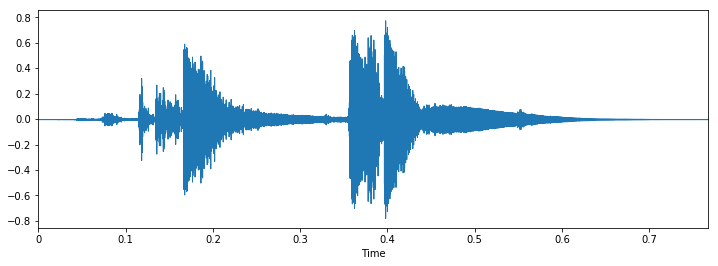

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [7]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

In [8]:
sound_file_paths = ["gun.wav", "bird.wav"]
sound_names = ["gun", "bird"]

In [9]:
raw_sounds = load_sound_files(sound_file_paths)

In [10]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [19]:
sounds_list = glob.glob("Sound-Data/fold1/*.wav")
sounds_list
directory = os.listdir("Sound-Data/fold1")
features = []
labels = []
directory

['bird-0.wav', 'birds-0.wav', 'gun-1.wav', 'guns-1.wav']

In [28]:
for i in directory:
    X, sample_rate = librosa.load("Sound-Data/fold1/"+i, res_type='kaiser_fast') 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    feature = mfccs
    label = i.split('-')[1].split('.')[0]
    features.append(feature)
    labels.append(label)

In [31]:
features

[array([  46.77399078,  173.03778721, -163.10981022,   90.63885019,
         -15.01526159,  -26.34029847,   37.42502322,  -28.58790113,
          18.8218193 ,   -4.70718196,   -9.23804157,   20.58849111,
         -17.03273789,   10.01994658,    3.49439883,   -8.44563896,
          11.86985658,   -8.50082437,    3.04433212,    3.27852877,
          -4.43521907,    7.16218969,   -3.45086673,    3.19792962,
           1.51530292,   -2.94815273,    5.21475851,   -3.50209842,
           1.91530307,    1.7798514 ,   -2.10945906,    4.54969687,
          -1.40570753,    1.31815984,    1.22360945,   -1.22117874,
           3.09944844,   -1.85549847,    1.36362184,    2.0699671 ]),
 array([-230.91227901,   42.73055824, -118.09566921,   -2.16903271,
         -15.29208781,   -3.79099946,  -22.98449627,  -31.46858245,
          12.21270834,   14.90513271,    7.81428804,   28.0952415 ,
          -1.91280598,   -4.09920068,   -7.21606264,   -0.41448892,
           2.11915483,   -1.31312468,   -1.685

In [36]:
features[1].shape

(40,)

In [42]:
from sklearn.preprocessing import LabelEncoder
import keras
lb = LabelEncoder()

labels = keras.utils.to_categorical(lb.fit_transform(labels))

In [54]:
features = numpy.array(features)
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [44]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [46]:
num_labels = labels.shape[1]
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

In [47]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [57]:
model.fit(features, labels, batch_size=2, epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 9ms/step - loss: 8.0686 - acc: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 0.5215 - acc: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 3.7997 - acc: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.7140 - acc: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 4.6558 - acc: 0.2500
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 3.7842 - acc: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5563 - acc: 0.2500
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5199 - acc: 0.5000
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5199 - acc: 0.5000
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6931 - acc: 0.5000
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5199 - acc: 0.75

In [55]:
type(features)

numpy.ndarray

In [ ]:
librosa.load()